In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [3]:
cc_data = pd.read_csv('creditcard.csv', on_bad_lines='skip')
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This data set is highly unbalanced. 0 = normal transaction, 1 = fraudulent transaction

In [8]:
legit = cc_data[cc_data.Class == 0]
fraud = cc_data[cc_data.Class == 1]

In [9]:
#eturns the number of rows x columns for each type of transaction
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
#stats for legit and fraud data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
#compare the mean values of each column for both types of transaction
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Undersampling

Build a sample dataset containing a similar distribution of normal transactions and fradulent transactions

Number of fradulent transactions = 492

In [13]:
legit_sample = legit.sample(n = 492)

Concatenating two DataFrames

In [14]:
df = pd.concat([legit_sample, fraud], axis = 0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122226,76482.0,1.007092,-0.801126,0.725574,0.638224,-1.157901,-0.060140,-0.598698,0.052632,-0.723674,...,-0.142153,-0.189284,-0.066775,0.035355,0.250483,-0.282465,0.057690,0.056370,141.00,0
199530,133006.0,-1.662681,-0.693223,0.908708,-0.853840,1.487502,1.055497,-0.278195,0.418199,0.547108,...,0.266837,1.280030,-0.608219,-1.568571,-0.407807,-0.495977,0.305525,0.030337,118.80,0
262154,160341.0,1.572673,-1.676452,-1.910323,-0.348354,-0.395544,-0.045136,-0.054851,-0.154990,-0.488214,...,0.142617,0.294375,-0.282290,0.205652,0.148175,-0.070892,-0.058165,-0.009140,316.00,0
164551,116803.0,1.762751,-0.590454,-0.039978,1.236302,-0.717670,0.329090,-0.821873,0.278148,1.060249,...,0.121446,0.293063,0.167593,-0.527998,-0.384025,-0.747170,0.058766,-0.023694,78.76,0
4170,3749.0,1.340340,-0.425672,0.569685,-0.705689,-0.627896,-0.009946,-0.812500,0.021967,0.244925,...,-0.184372,-0.406247,0.118994,-0.378824,0.151656,-0.488487,-0.004038,0.000348,12.29,0


In [15]:
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [16]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [17]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and targets

In [18]:
X = df.drop(columns = 'Class', axis = 1) #will be used for features 
Y = df['Class'] #will be used for labels
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
122226   76482.0  1.007092 -0.801126  0.725574  0.638224 -1.157901 -0.060140   
199530  133006.0 -1.662681 -0.693223  0.908708 -0.853840  1.487502  1.055497   
262154  160341.0  1.572673 -1.676452 -1.910323 -0.348354 -0.395544 -0.045136   
164551  116803.0  1.762751 -0.590454 -0.039978  1.236302 -0.717670  0.329090   
4170      3749.0  1.340340 -0.425672  0.569685 -0.705689 -0.627896 -0.009946   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

Heatmap of dataset

As can be seen from the heatmap, it would appear that variable V14 has the strongest correlation with the class variable aside from the class variable itself. 

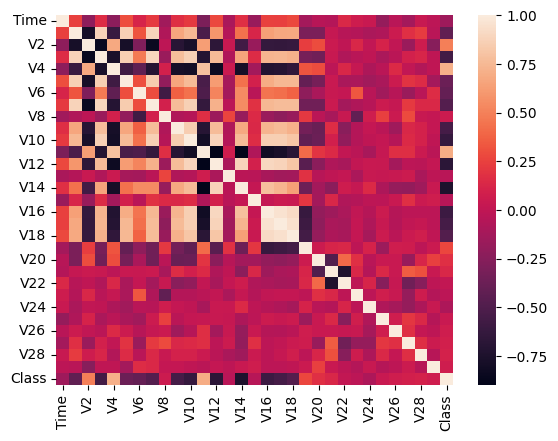

In [19]:
ax = sns.heatmap(df.corr())

In [20]:
print(Y)

122226    0
199530    0
262154    0
164551    0
4170      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training and testing data


In [21]:
#20% of data will be used as testing data, the other 80% as training data
xtr, xts, ytr, yts = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X.shape, xtr.shape, xts.shape)

(984, 30) (787, 30) (197, 30)


Linear Regression Classifier

In [51]:
li = LinearRegression()
li.fit(xtr, ytr)
train = li.predict(xtr).round()
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = li.predict(xts).round()
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)

Accuracy of training set: 0.9237611181702668
Accuracy of test set: 0.8730964467005076


Logistic Regression Classifier

In [53]:
lr = LogisticRegression(max_iter=10000)
lr.fit(xtr, ytr)
train = (lr.predict_proba(xtr)[:, 1] > 0.3).astype(int) 
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = (lr.predict_proba(xts)[:, 1] > 0.3).astype(int) 
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)

Accuracy of training set: 0.9466327827191868
Accuracy of test set: 0.9441624365482234


K Nearest Neighbors Classifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtr, ytr)
train = knn.predict(xtr)
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = knn.predict(xts)
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)

Accuracy of training set: 1.0
Accuracy of test set: 0.6345177664974619


Decision Tree Classifier

As can be seen from the tree diagram below, V14 is the first attribute that the tree is split on. This supports the results of the heatmap from earlier. 

Accuracy of training set: 1.0
Accuracy of test set: 0.8781725888324873


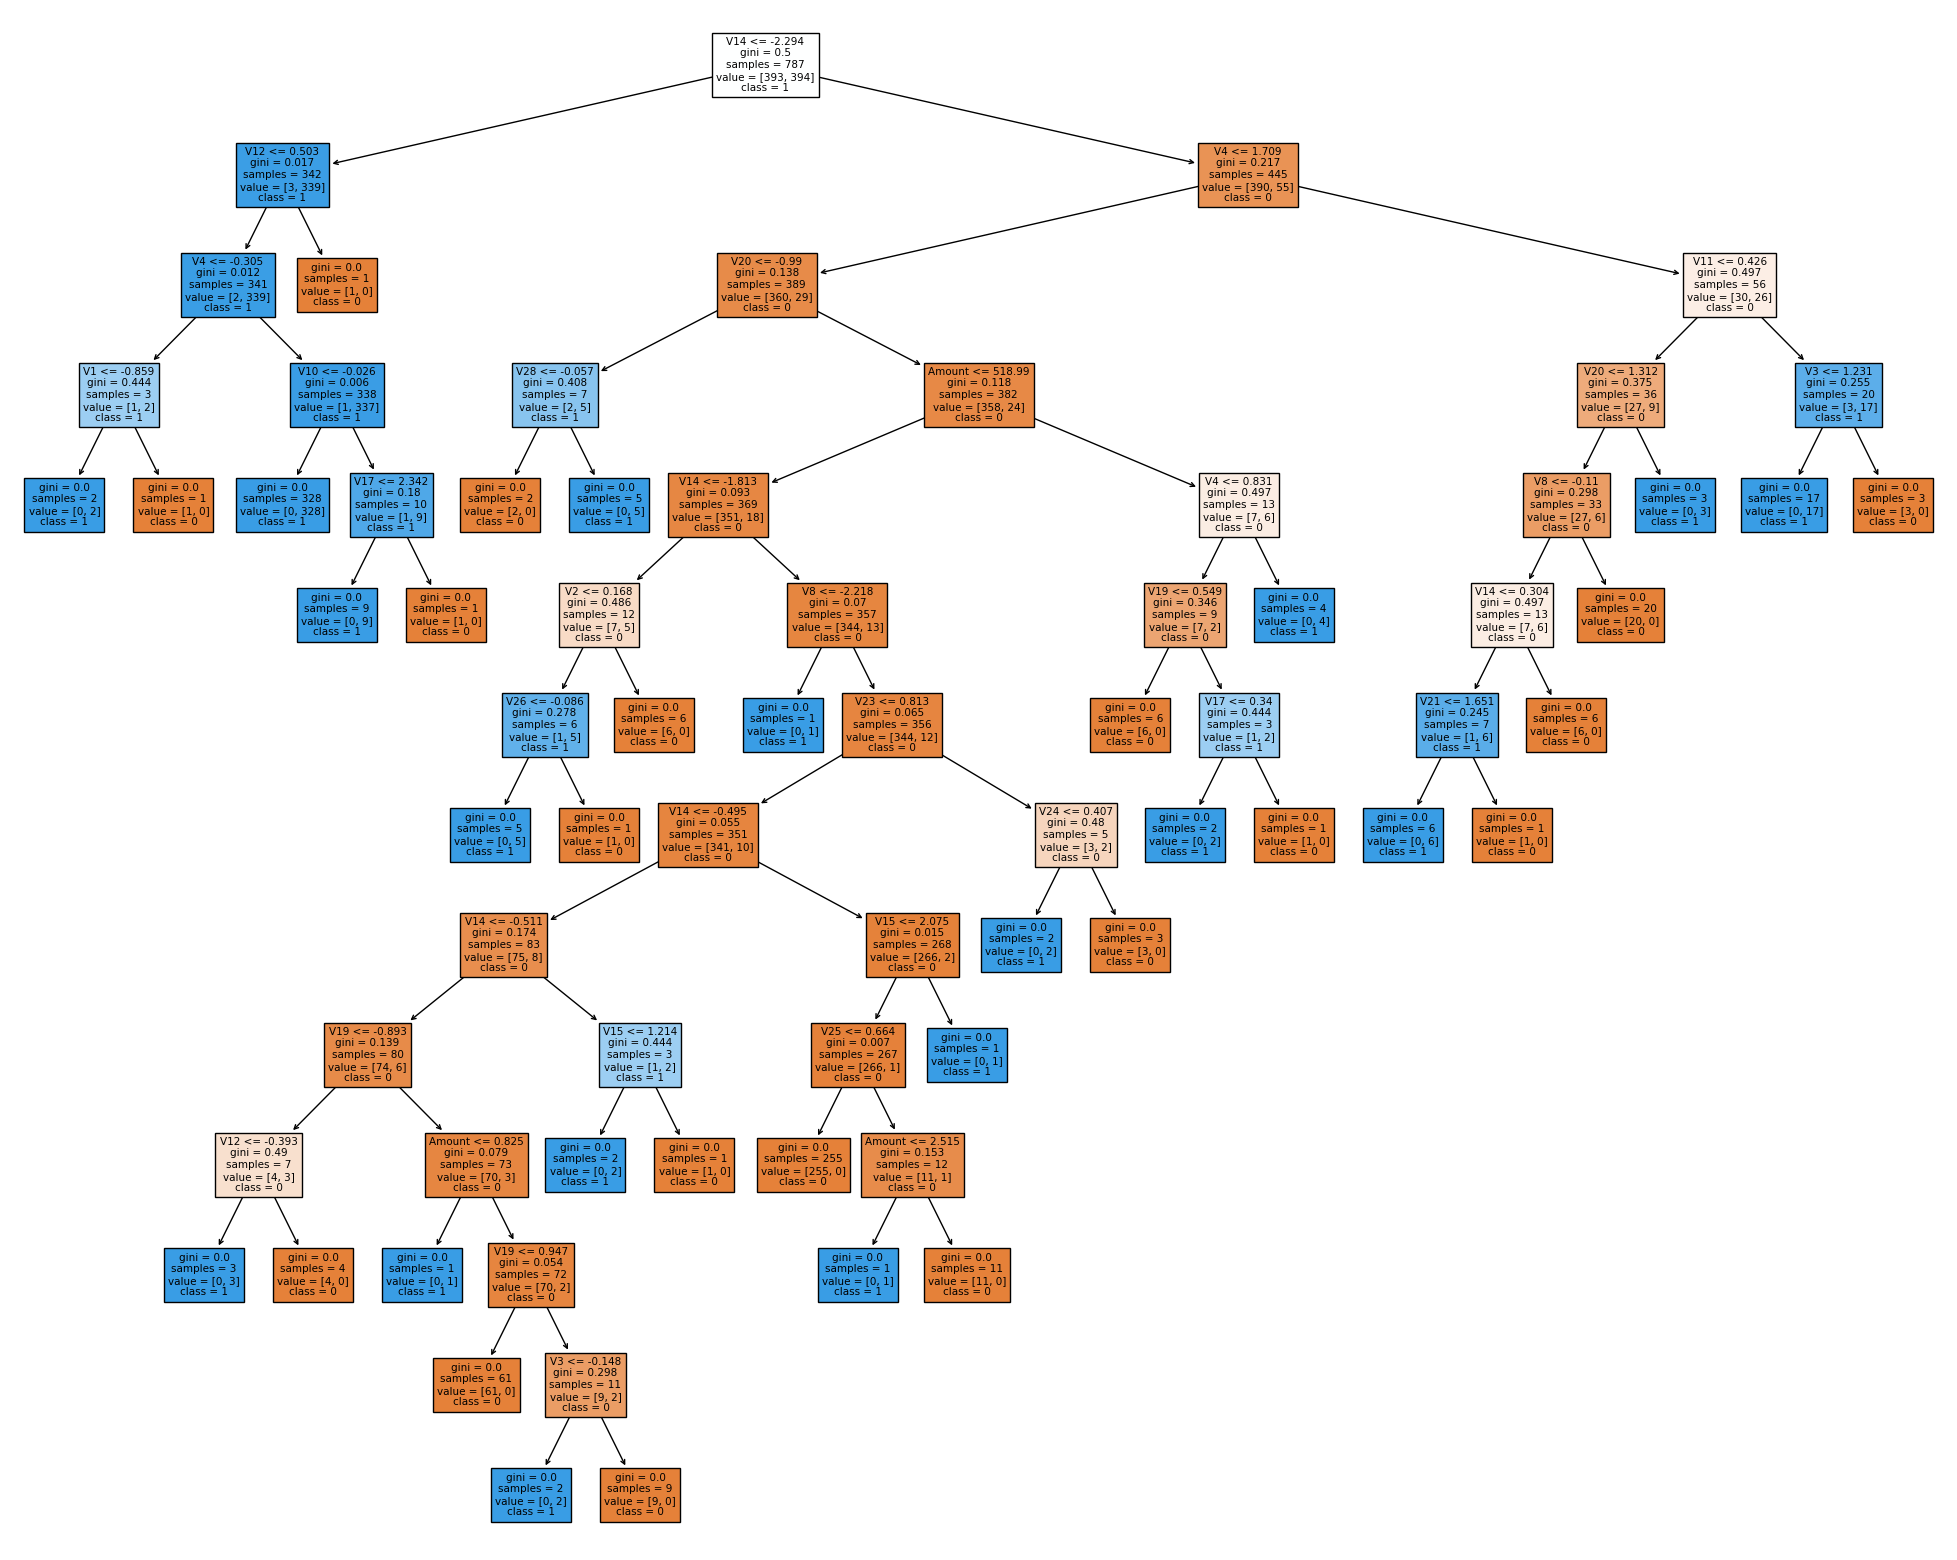

In [35]:
dt = DecisionTreeClassifier()
dt.fit(xtr, ytr)
train = dt.predict(xtr)
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = dt.predict(xts)
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=df.columns, class_names=['0','1'], filled=True)


Bagging Classifier

In [36]:
dc = DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
nit = 100
bc = BaggingClassifier(dc, n_estimators=nit)
bc.fit(xtr, ytr)
train = bc.predict(xtr)
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = bc.predict(xts)
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)

Accuracy of training set: 0.9504447268106735
Accuracy of test set: 0.9187817258883249


Random Forest Classifier

In [37]:
rf = RandomForestClassifier(max_depth=2)
rf.fit(xtr, ytr)
train = rf.predict(xtr)
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = rf.predict(xts)
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)

Accuracy of training set: 0.928843710292249
Accuracy of test set: 0.9086294416243654


Support Vector Machines

In [38]:
svm = svm.SVC()
svm.fit(xtr, ytr)
train = svm.predict(xtr)
acc_score = accuracy_score(train, ytr)
print("Accuracy of training set:", acc_score)
test = svm.predict(xts)
acc_score = accuracy_score(test, yts)
print("Accuracy of test set:", acc_score)

Accuracy of training set: 0.5400254129606099
Accuracy of test set: 0.5279187817258884
